# A Backwards Approach to Pandas

### The Hacker Within, Berkeley Feb 10 2016
### Tenzing Joshi -- Applied Nuclear Physics, LBL


This notebook is an introduction to the pandas library for python.  We'll go over the data structures of pandas and explore some of their uses.  We'll then play around with some data from a mobile gamma-ray detector array to look at some real uses of DataFrames.


## Resources

* Pandas site
  * http://pandas.pydata.org/pandas-docs/stable/overview.html
  * There are loads of useful examples and tutorials on this site
  * If you're curious then take some time to look around
  
* Wes's Book
  * Wes McKinney started Pandas
  * Wes wrote a book titled **Python for Data Analysis**
  * http://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1449319793
  * This was my starting point and there is great stuff in this book

* Other Pandas tutorials I found online with a 5 minute google search
  * http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/
  * http://synesthesiam.com/posts/an-introduction-to-pandas.html
  * https://plot.ly/ipython-notebooks/big-data-analytics-with-pandas-and-sqlite/

* Stack Overflow
  * There are a large number of Pandas related answers on here
  * http://stackoverflow.com/questions/tagged/pandas
  * It seems like this site is monitored for pandas tagged questions, if you're stumped then this is a great place to ask a question.
  

## What is Pandas?  

I'll just let the Pandas [website](http://pandas.pydata.org/pandas-docs/stable/overview.html) do the talking here...


> pandas consists of the following things

> - A set of labeled array data structures, the primary of which are Series and DataFrame
>   - **Series** 1D labeled homogenously typed array
>   - **DataFrame** 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed columns
>   - **Panel** General 3D labeled, also size-mutable array
> - Index objects enabling both simple axis indexing and multi-level / hierarchical axis indexing
> - An integrated group by engine for aggregating and transforming data sets
> - Date range generation (date_range) and custom date offsets enabling the implementation of customized frequencies
> - Input/Output tools: loading tabular data from flat files (CSV, delimited, Excel 2003), and saving and loading pandas objects from the fast and efficient PyTables/HDF5 format.
> - Memory-efficient “sparse” versions of the standard data structures for storing data that is mostly missing or mostly constant (some fixed value)
> - Moving window statistics (rolling mean, rolling standard deviation, etc.)
> - Static and moving window linear and panel regression


Pandas has a truly *incredible* amount of functionality, however, accessing a lot of this requires understanding the nuance of Index objects and knowning that the functionality exists.  

In [1]:
import numpy as np
import pandas as pd

### Lets first play with Series

In [ ]:
sadstring = 'sadnap'
mfs = pd.Series(list(sadstring))
mfs

#### Series are like np.arrays, but they have indicies.  If you don't specify on creation it will initialize to range(len(object)).  Indicies are big part of what makes pandas useful, but also a bit tricky.  We'll get to using indicies in more detail in a bit.

The .values attribute will return the underlying numpy array or recarray

In [ ]:
mfs.values

The associated index can be viewed.  Theres also plenty of attributes for working with more complicated indicies.

You can also write yourself a new index.

In [ ]:
mfs.index

In [ ]:
mfs.index = range(5,11)
mfs

Grabbing a component in a Series is as easy as grabbing based on its label.

In [ ]:
mfs[5]

.ix, .iloc, and .loc can be used to slice in different ways too.  More about this in a bit. 

In [ ]:
mfs.loc[10]

In [ ]:
mfs.loc[8:10]

In [ ]:
mfs.iloc[:3]

Passing a list of labels works as you'd expect.  The ordering of the list is preserved in the result!

In [ ]:
listoflabels = np.arange(10,4,-1)
mfs[listoflabels]

Adding a few items is straightforward.

In [ ]:
mfs[4] = ' '
mfs[0] = ' wants friend'

In [ ]:
mfs.loc[[5,6,7,4,10,9,8,7,6,0]].tolist()

In [ ]:
''.join(_)

#### Sad pandas are silly anyways, how about something with numbers, because pandas play nicely with math.

In [ ]:
animalsdict = {
    'moose':1220,
    'buffalo':774,
    'chicken':13,
    'sadpanda':97,
    'platypus':2084
}
mss = pd.Series(animalsdict)
mss.name = 'CoolFactor'
mss

In [ ]:
mss * 2.41

In [ ]:
mss>555

In [ ]:
mss[mss>555]

Boolean masking can work with a boolean Series or a boolean array of appropriate length. 

The .apply method can applie an arbitray function to each labeled piece.  When we get to 2D structures you can apply to rows or columns if you'd like.

In [ ]:
mss[mss>555].apply(np.random.poisson)

In [ ]:
np.min(mss)

In [ ]:
mss.argmin()

In [ ]:
mss.describe()

#### Series are also a bit like ordered dictionaries with fixed length.

You can check which *labels* are in your Series.

In [ ]:
'chicken' in mss

In [ ]:
13 in mss

### This next bit is an extra example, but for the talk we'll move on.

In [ ]:
mts = pd.Series( {'chicken':1.2, 
                  'moose':30.77, 
                  'elk': 22.88, 
                  'marmot':4.49,
                  'platypus':14.9,
                  'humans':100.,
                  'sadpanda':0.9} )
mts.name = 'NormalizedRadFactor'
mts

In [ ]:
coolness = mss / mss.chicken
radness = mts

print coolness

print radness

In [ ]:
animalBitCoinValue = (radness + coolness * radness) / radness.max()
animalBitCoinValue

In [ ]:
animalBitCoinValue.isnull()

In [ ]:
prizedAnimals = animalBitCoinValue[animalBitCoinValue>17.]
print prizedAnimals

In [ ]:
animalBitCoinValue.fillna(1.)

## DataFrames are 2D data structures, columns can be different dtypes, and columns and rows have indicies.  

### Theres more than one way to make a DataFrames (and Series).
* numpy arrays
* lists
* csv files
* excel files
* databases queries
* dicts of things
* lists of series
* other dataframes
* Seriously, it gets a bit rediculous, but in a good way once you get the hang of it.

I personally end up using np.arrays, dicts of arrays, lists of named Series, and sometimes concatenate lists of DFs. 

Lets make a DataFrame (df) with a dict.

In [ ]:
data = {'state':['Ohio','California','Indiana','Idaho'],
        'year':[2000,2001,2002,2004],
        'pop':[23.4,34.1,7.8,1.3]}
df = pd.DataFrame(data)
df

.index gives us the row index

.columns gives the column index

In [ ]:
print df.index
print ' '
print df.columns

In [ ]:
df['state']

In [ ]:
df.year

In [ ]:
df2 = pd.DataFrame(data, columns=['pop','state','year','debt'], index=range(1,5))
df2

In [ ]:
df2[1]

### Knowing how to slice into a dataframe to get at your data takes practice.  Pandas has a lot of choices for doing this, but that is because they are needed to cover all sorts of functionality.

#### Seriously.  Practice... experiment... work through some tutorials/cookbooks on the web.

[Indexing options](http://pandas.pydata.org/pandas-docs/stable/indexing.html)
1. **df[LABEL]**, returns the corresponding value in a Series or a column of a dataframe with index of LABEL.
2. **df.LABEL**, returns the corresponding value in a Series or a column of a dataframe with index of LABEL.
3. Next we have **df.loc[LABEL]** or **df.loc[LABEL1, LABEL2]**.  This is label based, but ca nalso take boolean masks.  Slicing can work too!  Lists of labels can work too!  
4. After that we've got **df.iloc[INT]** and **df.iloc[INT1,INT2]**.  This is integer location along the different axes... like referencing location in a numpy array.
5. Then there is **df.ix** which can take mixed labels and integer locations.  Be careful with this, but I use it quite often because df.ix is shorter than df.loc.  Dumb, I know.
6. **df.xs()** comes in pretty handy with grabbing interesting data from MultiIndex frames.  More on that later. But you can basically grab a cross-section of a dataframe based on the value of an index, and you can specify the level of that index.

In [ ]:
print df2

In [ ]:
df2.loc[1]

In [ ]:
df2.iloc[0]

In [ ]:
df2.ix[1,'state']

In [ ]:
df2['state'][1]

In [ ]:
df2.loc[1:3,'year']

In [ ]:
df2['debt'] = 22
df2

In [ ]:
df2.loc[3,'debt'] = 0.22
df2.loc[2,'debt'] = np.nan
df2

In [ ]:
df2.fillna(321)

In [ ]:
df2.values

In [ ]:
df2.reindex(range(6), fill_value=0.1)

In [ ]:
df2

Loads of Pandas functions will return a **new** object.  The original is left in tact.  Sometimes you'll want to overwrite the old object, in this case also pass the **inplace=True** flag.

In [ ]:
df2.drop(2)

Some functionality could be applied to rows or columns.  To break the ambiguity there is the **axis** flag.  **axis=0** corresponds to rows, **axis=1** corresponds to columns.

In [ ]:
df2.drop('year', axis=1)

In [ ]:
df2.loc[[2,4],['pop','state']] = [[11.1,'Maine'],[87,'Canada']]
print df2

#### OK, so that was a quick introduction to DataFrames and how to touch some of the data that lives inside of them.  





## QUESTIONS BEFORE WE CONTINUE?

### For this next section lets play with some data that I was working with last week.

This data comes from a mobile array of High Purity Germanium (HPGe) Detectors.  It is measuring the gamma-ray background.  In this background we'll have events across a range of energies, and some peaks at a few characteristic energies.

Please do not distribute this data, not that you would want to.  While this is part of a semi-open dataset access to this dataset should be pursued through the formal channels.

https://dl.dropboxusercontent.com/u/4558549/THWPasses_segmented.hdf5

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

Pandas can write objects to loads of different formats.  It can also read them in from a variety of formats.  The amount of functionality in read_csv is great!

Pandas has PyTables integration!  This means that you can drop your Series or DataFrames directly into an HDF5 file (called an HDFStore in Pandas lingo).  Lets open the Store of data we'll use.

In [3]:
infile = pd.HDFStore('THWPasses_segmented.hdf5','r')

In [5]:
print infile

<class 'pandas.io.pytables.HDFStore'>
File path: THWPasses_segmented.hdf5
/GPSdata             frame        (shape->[14371,4])  
/HPGedata            frame        (shape->[2328352,4])


In [6]:
keys = infile.keys()
print keys

['/GPSdata', '/HPGedata']


So we've got a few dataframes hiding inside

In [7]:
gpsdf = infile[keys[0]]

gammadf = infile[keys[1]]
infile.close()

#### Whats inside?

In [ ]:
gammadf.head(10)

In [ ]:
gpsdf.head(10)

#### Anyone have ideas of questions we could ask about the data?

#### Ok, here are a few things I did...

In [ ]:
gammadf.detch.value_counts()

Looks like two outliers...  Lets investiage by looking at the spectra of each of our detectors.

In [ ]:
fullhistogram = gammadf.groupby('detch').energy.apply(lambda x: np.histogram(x, bins=range(0,3000,1))[0])
fullhistogram.head()

Groupby is quite powerful once you get the hang of it.  Here we've grouped our gamma-ray events by channel number.  Then for each group we've applied a function to that entire group, in this case we've histogrammed.  

The results of the application of this function to each group is returned as a Series (or DF if the result has length), indexed by the grouped variable (detch).  In my lambda function I've selected only the binned data and not the bins themselves.  

While handy, a Series of lists isn't super helpful, but we can apply Pd.Series to each list and make our selves a dataframe.

In [ ]:
fullhistogram = fullhistogram.apply(pd.Series)

In [ ]:
fullhistogram.head()

In [ ]:
fullhistogram.T.plot(figsize=(12,8))

Maybe we could normalize by number of events... and look at only the 1460 keV peak.

In [ ]:
fullhistogram.div(gammadf.detch.value_counts(),axis=0).loc[:,1450:1470].T.plot(figsize=(12,8))
plt.xlabel('Energy (keV)')
plt.ylabel('Normalized counts')

Great, all of the detectors are working nicely.  

#### If time is short lets group by detch and segment to get a multi-index dataframe.

In [123]:
fullhistogram = gammadf.groupby(['detch','segment']).energy.apply(lambda x: np.histogram(x, bins=range(0,3000,1))[0])
fullhistogram = fullhistogram.apply(pd.Series)
fullhistogram.head()

0     1     2     3     4     5     6     7     8     9     \
detch segment                                                               
1     0           0     0     0     0     0     0     0     0     0     0   
      1           0     0     0     0     0     0     0     0     0     0   
      2           0     0     0     0     0     0     0     0     0     0   
      3           0     0     0     0     0     0     0     0     0     0   
      6           0     0     0     0     0     0     0     0     0     0   

               ...   2989  2990  2991  2992  2993  2994  2995  2996  2997  \
detch segment  ...                                                          
1     0        ...      0     0     0     0     0     0     0     0     0   
      1        ...      0     0     0     0     0     0     0     0     0   
      2        ...      0     0     0     0     0     0     0     0     0   
      3        ...      0     0     0     0     0     0     0     0     0   
      6        ...      0     0     0     0     0     0     0     0     0   

               2998  
detch segment        
1     0           0  
      1           0  
      2           0  
      3           0  
      6           0  

[5 rows x 2999 columns]

Lets just sort by timestamp so that we have sequential data, also we'll reset the index.

In [8]:
gammadf.sort_values(by='timestamp', inplace=True)
gpsdf.sort_values(by='timestamp', inplace=True)
gammadf.reset_index(inplace=True, drop=True)
gpsdf.reset_index(inplace=True, drop=True)

How about the GPS data?

In [ ]:
gpsdf.describe()

Looks like there isn't much variance in the GPS positions.  Lets convert to meters in cartesian space to have a look!

In [11]:
# in meters
R_earth = 6371000
degtoster = np.pi/180.

def haversine(lat1deg, lon1deg, lat2deg, lon2deg):
	"""
	Calculate the great circle distance between two points in meters
	and the bearing direction on the earth (specified in decimal degrees)
	"""
	# convert decimal degrees to radians 
	lon1=(np.pi/180)*lon1deg
	lat1=(np.pi/180)*lat1deg
	lon2=(np.pi/180)*lon2deg
	lat2=(np.pi/180)*lat2deg
	# haversine formula 
	dlon = lon2 - lon1 
	dlat = lat2 - lat1 
	a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
	c = 2 * np.arcsin(np.sqrt(a)) 
	
	# distance
	dist = R_earth * c
	
	# bearing direction
	direction = np.arctan2( np.sin(dlon)*np.cos(lat2), 
						np.cos(lat1)*np.sin(lat2) - np.sin(lat1)*np.cos(lat2)*np.cos(dlon) )
	 
	return dist, direction

vhaversine = np.vectorize(haversine)

def convertLatLon(originlat, originlon, lat, lon):
	r, heading = vhaversine(originlat, originlon, lat, lon)
	x = r * np.sin(heading)
	y = r * np.cos(heading)

	return y,x

vconvertLatLon = np.vectorize(convertLatLon)

In [12]:
y,x = vconvertLatLon(gpsdf.lat.min(), gpsdf.lon.min(), gpsdf.lat, gpsdf.lon)

In [13]:
gpsdf['x'] = x
gpsdf['y'] = y
gpsdf.head()

,timestamp,lat,lon,segment,x,y
0,1.331661e+09,37.872436,-122.266358,0,784.957176,135.510092
1,1.331661e+09,37.872433,-122.266371,0,783.786873,135.194928
2,1.331661e+09,37.872430,-122.266385,0,782.572682,134.879759
3,1.331661e+09,37.872427,-122.266399,0,781.329235,134.546056
4,1.331661e+09,37.872424,-122.266413,0,780.056529,134.212350


### Groupby objects can be iterated over.  Lets groupby each segment and plot the path in cartesian coordinates.

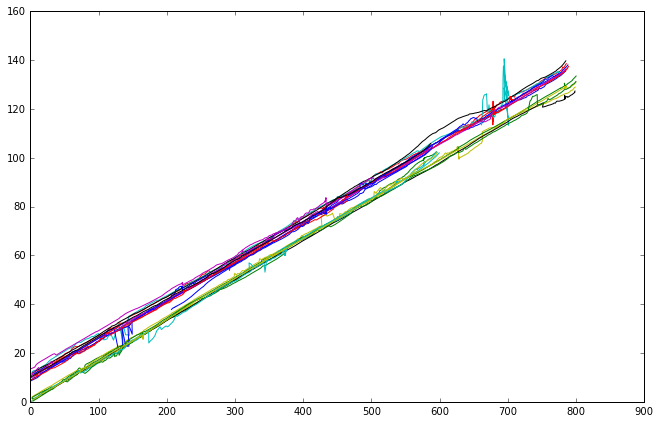

In [21]:
gpssegments = gpsdf.groupby('segment')

plt.figure(figsize=(11,7))
for segname, segdat in gpssegments:
    plt.plot(segdat.x, segdat.y, label=segname)

#### This data comes from the mobile detector system driving up and down a few blocks of University Ave. in Berkeley.  Sometimes Eastbound (lower lines) and sometimes Westbound (upper lines).  

There is definitely some noise in the GPS, applying a filter could be a good idea, but for now lets just select the eastbound segments.

In [23]:
eastbound = gpsdf.groupby('segment').apply(lambda aa: aa.x.iloc[-1] - aa.x.iloc[0]) > 0

In [47]:
gammadfE = gammadf.set_index('segment').ix[eastbound].reset_index()
gpsdfE = gpsdf.set_index('segment').ix[eastbound].reset_index()

Ok, perhaps distance down the road would let us aggregate along chunks of distance here and look at the variability of natural radioactivity.

In [48]:
gpsdfE['distance'] = np.sqrt(gpsdfE.x**2 + gpsdfE.y**2)

### Pandas is built for time series and plays nice with Datetime.  

These are features that I don't often use, but lets look quickly at the timestamp data.  This is in UTC.

In [49]:
from datetime import datetime
gpsdfE.timestamp.apply(datetime.fromtimestamp).head()

0   2012-03-13 13:14:50.600
1   2012-03-13 13:14:50.800
2   2012-03-13 13:14:51.000
3   2012-03-13 13:14:51.200
4   2012-03-13 13:14:51.400
Name: timestamp, dtype: datetime64[ns]

Ok, that works.  Maybe lets make it a DateTime Index and see what we can do!

In [51]:
gpsdfEts = gpsdfE.set_index(gpsdfE.timestamp.apply(datetime.fromtimestamp))
gpsdfEts.head()

,segment,timestamp,lat,lon,x,y,distance
timestamp,,,,,,,
2012-03-13 13:14:50.600,1,1.331670e+09,37.871230,-122.275272,2.516258,1.445534,2.901917
2012-03-13 13:14:50.800,1,1.331670e+09,37.871229,-122.275253,4.184010,1.260210,4.369676
2012-03-13 13:14:51.000,1,1.331670e+09,37.871229,-122.275233,5.939539,1.371406,6.095808
2012-03-13 13:14:51.200,1,1.331670e+09,37.871233,-122.275212,7.797473,1.779123,7.997866
2012-03-13 13:14:51.400,1,1.331670e+09,37.871234,-122.275192,9.553001,1.853254,9.731104


In [52]:
gpsdfEts.loc['2012-03-20'].tail()

,segment,timestamp,lat,lon,x,y,distance
timestamp,,,,,,,
2012-03-20 13:22:41.000,5,1.332275e+09,37.872369,-122.266230,796.178463,128.135245,806.423454
2012-03-20 13:22:41.200,5,1.332275e+09,37.872372,-122.266222,796.866002,128.468896,807.155303
2012-03-20 13:22:41.400,5,1.332275e+09,37.872374,-122.266214,797.612072,128.654294,807.921373
2012-03-20 13:22:41.600,5,1.332275e+09,37.872375,-122.266205,798.314259,128.802622,808.638220
2012-03-20 13:22:41.800,5,1.332275e+09,37.872376,-122.266198,798.957931,128.913880,809.291397


We can re-sample our DateTimeIndex and specify the function to apply during the resampling.  Dropping all of the days that are empty with dropna(), we can look at what days we have Eastbound data.

In [53]:
gpsdfEts.resample('D', how=np.mean).dropna()

,segment,timestamp,lat,lon,x,y,distance
timestamp,,,,,,,
2012-03-13,1,1.331670e+09,37.871730,-122.271460,337.118134,56.990145,341.904413
2012-03-20,5,1.332275e+09,37.871942,-122.269758,486.456360,80.592982,493.094304
2012-04-03,8,1.333482e+09,37.872092,-122.268628,585.692351,97.284867,593.718432
2012-04-05,10,1.333658e+09,37.871713,-122.271547,329.480961,55.164973,334.067728
2012-04-09,12,1.334004e+09,37.871950,-122.269671,494.172193,81.467377,500.842788
2012-04-17,13,1.334696e+09,37.872014,-122.269041,549.386307,88.598695,556.486370
2012-04-18,15,1.334780e+09,37.871804,-122.270759,398.595063,65.294618,403.909017
2012-04-24,17,1.335298e+09,37.871817,-122.270735,400.704672,66.718733,406.223228
2012-04-25,19,1.335387e+09,37.871605,-122.272341,259.794683,43.092459,263.345775


#### Another powerful functionality is joining and merging.  Theres loads of ways do to this, and to think about it, but lets say we just want to join our 

In this example we'll join our eastbound gamma-ray data (all columns) with the eastbound GPS data (distance and time).

We'll just the 'timestamp' value as the joining variable and perform an outer join, meaning we'll keep all timestamp values from both dataframes.  

In [93]:
lmjoined = gammadfE.merge(gpsdfE[['distance','timestamp']], left_on='timestamp', right_on='timestamp', how='outer')

In [94]:
lmjoined.head()

,segment,timestamp,detch,energy,distance
0,1,1.331670e+09,26,399.345154,NaN
1,1,1.331670e+09,29,101.067833,NaN
2,1,1.331670e+09,2,123.998184,NaN
3,1,1.331670e+09,3,223.163559,NaN
4,1,1.331670e+09,25,1221.298584,NaN


In [95]:
lmjoined.tail()

,segment,timestamp,detch,energy,distance
996027,NaN,1.335387e+09,NaN,NaN,601.182680
996028,NaN,1.335387e+09,NaN,NaN,602.352183
996029,NaN,1.335387e+09,NaN,NaN,603.495995
996030,NaN,1.335387e+09,NaN,NaN,604.646094
996031,NaN,1.335387e+09,NaN,NaN,605.753012


In [65]:
lmjoined.timestamp.diff().describe()

count     996031.000000
mean           3.732178
std         4400.523805
min     -3717364.999868
25%            0.000100
50%            0.000400
75%            0.001100
max      1206483.200000
Name: timestamp, dtype: float64

Looks like we should sort again before doing anything.

In [96]:
lmjoined = lmjoined.sort_values('timestamp').reset_index(drop=True)

Forward and backward fill work as expected.  There are interpolation tools as well. 

We'll fill forward first in the distance column (in our timesorted frame) then backwards to get the straggling events.  This is allowing us to label each gamma-ray event with the corresponding distance coordinate.

In [97]:
lmjoined.distance.ffill(inplace=True)
lmjoined.distance.bfill(inplace=True)

Now any row that has np.nan is a GPS time point that has no gamma-ray data.  Lets drop these.

In [99]:
lmjoined.dropna(inplace=True)
lmjoined.head()

,segment,timestamp,detch,energy,distance
0,1,1.331670e+09,26,399.345154,2.901917
1,1,1.331670e+09,29,101.067833,2.901917
2,1,1.331670e+09,2,123.998184,2.901917
3,1,1.331670e+09,3,223.163559,2.901917
4,1,1.331670e+09,25,1221.298584,2.901917


Next, lets categorize distance values so we can group them.  With that we can then look at variability in gamma-ray backgrounds.

In [101]:
stepsize = 20
lmjoined['distchunk'] = (lmjoined.distance // stepsize).astype(int) * stepsize + stepsize/2

I like this trick of // division and casting as an integer to make a nice arbitrary unit value for grouping...

Another way is using pd.cut to label data.  Perhaps silly here, but useful in other circumstances.

In [102]:
labeledges = np.arange(0,lmjoined.distance.max()+stepsize,stepsize)
labels = (labeledges[:-1] + labeledges[1:])/2
lmjoined['distchunk2'] = pd.cut(lmjoined.distance, labeledges, labels=labels, include_lowest=False)

In [103]:
lmjoined.head()

,segment,timestamp,detch,energy,distance,distchunk,distchunk2
0,1,1.331670e+09,26,399.345154,2.901917,10,10
1,1,1.331670e+09,29,101.067833,2.901917,10,10
2,1,1.331670e+09,2,123.998184,2.901917,10,10
3,1,1.331670e+09,3,223.163559,2.901917,10,10
4,1,1.331670e+09,25,1221.298584,2.901917,10,10


#### Lets calculate the normalized (by time and detector number) spectra for each segment/distchunk combination.

In [104]:
segdistgroup = lmjoined.groupby(['segment','distchunk'])
histdata = segdistgroup.energy.apply(lambda x: 1. * np.histogram(x,bins=np.arange(0,3000,1))[0]).apply(pd.Series)
deltaT = segdistgroup.timestamp.max() - segdistgroup.timestamp.min()
numdetectors = segdistgroup.detch.apply(lambda x: len(x.unique()))

In [105]:
normhist = histdata.div(deltaT, level=[0,1], axis=0)
normhist = normhist.div(numdetectors, level=[0,1], axis=0)

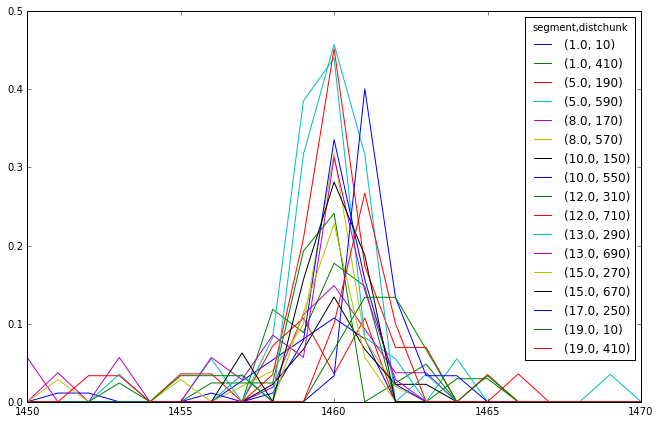

In [120]:
normhist.ix[::20,1450:1470].T.plot(figsize=(11,7))

#### Ok, maybe we could look at the content of a few peaks and compare it as a function of position

In [135]:
peakratesdict = {}
peakratesdict['k'] = normhist.loc[:,1460-3:1460+3].sum(axis=1)
peakratesdict['pos'] = normhist.loc[:,511-3:511+3].sum(axis=1)
peakratesdict['tl'] = normhist.loc[:,2614-3:2614+3].sum(axis=1)
peakratesdict['bi'] = normhist.loc[:,609-3:609+3].sum(axis=1)

peakrates = pd.DataFrame(peakratesdict)

In [136]:
peakrates.head()

bi         k       pos        tl
segment distchunk                                        
1       10         0.214508  0.348576  0.187695  0.053627
        30         0.294648  0.294648  0.088394  0.029465
        50         0.393644  0.393644  0.164018  0.098411
        70         0.403122  0.429997  0.241873  0.053750
        90         0.240926  0.321235  0.133848  0.053539

In [137]:
peakrates = peakrates.reorder_levels([1,0]).sort_index()
peakrates.head()

bi         k       pos        tl
distchunk segment                                        
10        1        0.214508  0.348576  0.187695  0.053627
          5        0.223284  0.491225  0.312598  0.044657
          8        0.074086  0.259302  0.148173  0.074086
          10       0.158831  0.370606  0.052944  0.000000
          12       0.104332  0.417327  0.208664  0.000000

You can 'unstack' and 'stack' different levels of multi-index data frames.  This means shifting a level of label from row to column or vice versa.

In [153]:
peakrates.unstack(level=0).head()

bi                                                    \
distchunk       10        30        50        70        90        110   
segment                                                                 
1          0.214508  0.294648  0.393644  0.403122  0.240926  0.336363   
5          0.223284  0.044744  0.250476  0.250025  0.297743  0.238230   
8          0.074086  0.134172  0.112657  0.188133  0.091141  0.068387   
10         0.158831  0.274054  0.071007  0.039124  0.034850  0.188026   
12         0.104332  0.090162  0.039077  0.156917  0.142285  0.078257   

                                                     ...           tl  \
distchunk       130       150       170       190    ...          630   
segment                                              ...                
1          0.255132  0.277909  0.231200  0.319146    ...          NaN   
5          0.192367  0.227790  0.130124  0.035738    ...     0.174879   
8          0.084027  0.128437  0.130205  0.166964    ...     0.108434   
10         0.062522  0.223790  0.170676  0.167381    ...          NaN   
12         0.122786  0.109405  0.199909  0.156956    ...     0.156297   

                                                                       \
distchunk       650       670       690       710       730       750   
segment                                                                 
1               NaN       NaN       NaN       NaN       NaN       NaN   
5          0.075206  0.054962  0.324867  0.143323  0.317601  0.143014   
8          0.092757  0.128874  0.060667  0.121754  0.091324  0.089225   
10              NaN       NaN       NaN       NaN       NaN       NaN   
12         0.000000  0.139190  0.104190  0.104329  0.031527  0.219496   

                                         
distchunk       770       790       810  
segment                                  
1               NaN       NaN       NaN  
5          0.130142  0.076574  0.129888  
8          0.113898  0.090911  0.003123  
10              NaN       NaN  0.000000  
12         0.085531  0.105354  0.163702  

[5 rows x 164 columns]

In [154]:
peakrates.unstack(level=0).apply(np.mean,axis=0)

    distchunk
bi  10           0.150863
    30           0.165015
    50           0.156804
    70           0.183355
    90           0.158092
    110          0.201987
    130          0.136936
    150          0.178103
    170          0.158330
    190          0.190795
    210          0.251013
    230          0.210231
    250          0.277758
    270          0.260378
    290          0.281739
    310          0.220636
    330          0.235983
    350          0.287998
    370          0.244327
    390          0.281017
    410          0.289085
    430          0.293724
    450          0.334633
    470          0.367174
    490          0.386006
    510          0.326980
    530          0.331746
    550          0.310770
    570          0.266145
    590          0.264054
                   ...   
tl  230          0.088000
    250          0.099944
    270          0.110004
    290          0.115316
    310          0.105147
    330          0.167223
    350          0.12626

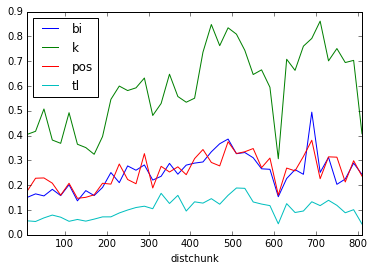

In [151]:
fig = plt.figure()
ax = fig.add_subplot(111)

peakrates.unstack(level=0).apply(np.mean,axis=0).unstack(level=0).plot(ax=ax)
